PROYECTO FINAL - CODERHOUSE DATA SCIENCE 

Alumno: Matias Mastropietro

ABSTRACT

El datasets contiene informacion sobre accidentes de transito en donde se encuentre involucrado un peaton y un vehículo con motor, bicicleta o incluso un caballo. En resumen, cualquier accidente que involucre a alguien a pie y alguna otra fuerza. 
Este dataset se corresponde a accidentes en Estados Unidos del año 2010 al 2018.



PREGUNTAS E HIPOTESIS

La finalidad de este trabajo será conocer cuáles son las variables que más afectan a la variable "Worst Injury in Crash" de un accidente con peatones, y armar un modelo que detecte en base a las variables más relevantes si un accidente tendrá lesiones o no. 

Es un problema es de clasificación.

Entre las subsiguientes hipotesis se encuentran:

La mayor cantidad de accidentes se producen en la oscuridad.
La mayor cantidad de accidentes son producidas por el género masculino.


DICCIONARIO DE VARIABLES

Crash Year = Año del accidente
Crash Month = Mes del accidente
Crash Day = Dia del accidente
Time of Day = Hora del accidente
Day of Week = Dia de la semana del accidente
City or Township = Lugar del accidente
Crash: Intersection = Si fue en una interseccion o no
Crash: Hit-and-Run = Si luego del accidente se escapo de la escena (Hit and run or Not hit and run)
Lighting Conditions = Condiciones de luminosidad al momento del accidente
Weather Condition = Como era el clima al momento del accidente
Speed Limit at Crash Site = Velocidad al momento del accidente
Worst Injury in Crash = Grado de lesiones (O = Sin lesiones, A = Lesiones serias, B = Lesiones Leves, C= Posibles Lesiones, K= Lesiones fatales )
Party Type = Conductor de auto
Person Age = Edad de la persona que sufrio el siniestro
Person Gender = Genero de la persona que sufrio el siniestro



MONTANDO DATASET E IMPORTANDO LIBRERIAS


In [54]:
#Carga de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import xgboost


In [55]:
#Carga de dataset / Default separator is ',' . / 'utf-8' codec can't decode por lo que uso otra codificacion
df = pd.read_csv("ped_crashes.csv", encoding="latin1")

DATA WRANGLING
Consiste en la manipulación, limpieza y unificación de datos complejos y desordenados para facilitar eL análisis y modelado. 


In [56]:
# Se observa en el DataFrame el nombre de cada columna, su Indice, la cantidad de columnas que posee (15) y filas (6809). Ademas se puede observar el tipo de datos de cada columna. 
#Por último se observa la cantidad de filas sin Nulos que posee cada columna.
# Tipo de datos: int64(10) : Caracteres numericos, entero de 64 Bits y object() Se asigna a la columna cuando posee tipos de datos mixtos (numeros y caracteres)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6809 entries, 0 to 6808
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Crash Year                  6809 non-null   int64 
 1   Crash Month                 6809 non-null   object
 2   Crash Day                   6809 non-null   int64 
 3   Time of Day                 6809 non-null   object
 4   Day of Week                 6809 non-null   object
 5   City or Township            6809 non-null   object
 6   Crash: Intersection         6809 non-null   object
 7   Crash: Hit-and-Run          6809 non-null   object
 8   Lighting Conditions         6809 non-null   object
 9   Weather Conditions (2016+)  6809 non-null   object
 10  Speed Limit at Crash Site   6809 non-null   object
 11  Worst Injury in Crash       6809 non-null   object
 12  Party Type                  6809 non-null   object
 13  Person Age                  6809 non-null   obje

In [57]:
#Lectura de primeras filas del dataset
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1,11:00 AM - 12:00 noon,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [58]:
# Forma del DataSet: Se observa que posee 6809 filas y 15 columnas
df.shape

(6809, 15)

In [59]:
# Descripcion estadistica de los datos numericos
df.describe()

,Crash Year,Crash Day
count,6809.000000,6809.000000
mean,2013.992216,15.384197
std,2.597471,8.701025
min,2010.000000,1.000000
25%,2012.000000,8.000000
50%,2014.000000,15.000000
75%,2016.000000,23.000000
max,2018.000000,31.000000


In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crash Year,6809.0,2013.992216,2.597471,2010.0,2012.0,2014.0,2016.0,2018.0
Crash Day,6809.0,15.384197,8.701025,1.0,8.0,15.0,23.0,31.0


In [61]:
# Cantidad de filas por columnas
df.count()

Crash Year                    6809
Crash Month                   6809
Crash Day                     6809
Time of Day                   6809
Day of Week                   6809
City or Township              6809
Crash: Intersection           6809
Crash: Hit-and-Run            6809
Lighting Conditions           6809
Weather Conditions (2016+)    6809
Speed Limit at Crash Site     6809
Worst Injury in Crash         6809
Party Type                    6809
Person Age                    6809
Person Gender                 6809
dtype: int64

In [62]:
#Revisamos el total de datos nulos por fila
#No hay nulos.

df.isnull().sum()

Crash Year                    0
Crash Month                   0
Crash Day                     0
Time of Day                   0
Day of Week                   0
City or Township              0
Crash: Intersection           0
Crash: Hit-and-Run            0
Lighting Conditions           0
Weather Conditions (2016+)    0
Speed Limit at Crash Site     0
Worst Injury in Crash         0
Party Type                    0
Person Age                    0
Person Gender                 0
dtype: int64

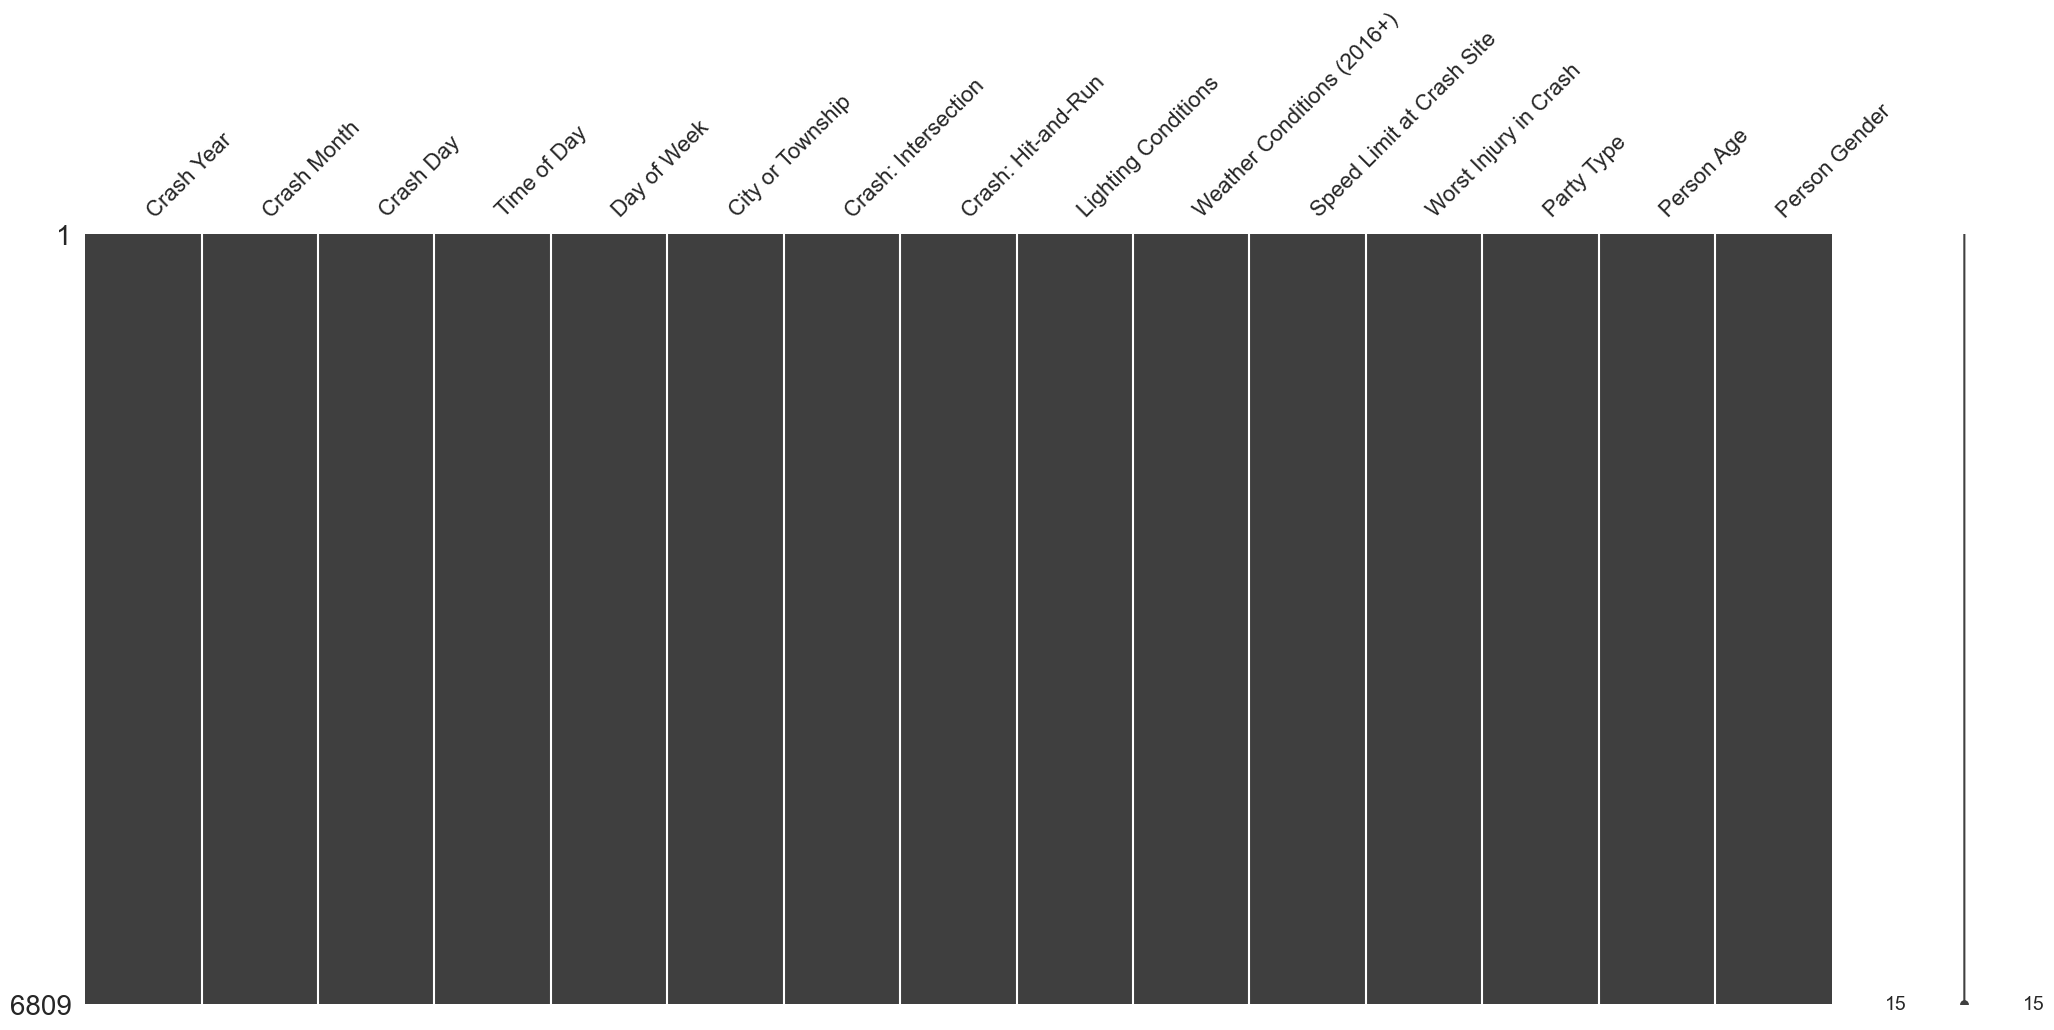

In [63]:
#Corroboramos que no existen valores Nulos con la libreria missingno.
import missingno as msno
msno.matrix(df)
plt.show()
     

In [64]:
#En la columna Time of Day reemplazamos los valores midnight por AM y noon por PM:

df['Time of Day'] = df['Time of Day'].str.replace('midnight','AM')
df['Time of Day'] = df['Time of Day'].str.replace('noon','PM')
df.head()

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
0,2018,February,1,9:00 AM - 10:00 AM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
1,2018,February,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
2,2018,February,1,11:00 AM - 12:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Daylight,Cloudy,30,Possible injury (C),Motor vehicle driver,DOB invalid,Uncoded & errors
3,2018,February,1,6:00 PM - 7:00 PM,Thursday,Wayne County: Detroit,Intersection crash,Hit-and-run,Dark lighted,Clear,30,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
4,2018,March,1,2:00 PM - 3:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Daylight,Snow,25,No injury (O),Motor vehicle driver,DOB invalid,Uncoded & errors


In [65]:
# Sanitizo columna Lighting Conditions reemplazando conjunto de valores.
df.replace({'Lighting Conditions': {'Uncoded & errors': 'Desconocido', 'Other / unknown': 'Desconocido'}},inplace = True)

In [66]:
df.sample(n=5)

,Crash Year,Crash Month,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Crash: Hit-and-Run,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
423,2018,January,17,12:00 PM - 1:00 PM,Wednesday,Wayne County: Canton Twp.,Not intersection crash,Not hit-and-run,Daylight,Clear,Uncoded & errors,Possible injury (C),Motor vehicle driver,46,Male
1215,2017,November,16,6:00 AM - 7:00 AM,Thursday,Wayne County: Plymouth Twp.,Not intersection crash,Hit-and-run,Dark unlighted,Clear,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
3439,2014,October,18,7:00 PM - 8:00 PM,Saturday,Wayne County: Trenton,Not intersection crash,Not hit-and-run,Dark lighted,Uncoded & errors,25,Fatal injury (K),Motor vehicle driver,71,Female
2449,2015,May,10,10:00 PM - 11:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Hit-and-run,Dark lighted,Uncoded & errors,35,Suspected minor injury (B),Motor vehicle driver,DOB invalid,Uncoded & errors
480,2018,December,18,6:00 PM - 7:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Not hit-and-run,Dark lighted,Clear,35,Suspected minor injury (B),Motor vehicle driver,44,Male


In [67]:
# Remuevo strings de  numeric lines
#df['Person Age'] = df['Person Age'].str.replace('Less than ','')
#df['Person Age'] = df['Person Age'].str.replace(' year old','')
#df['Person Age'] = df['Person Age'].str.replace('DOB invalid','')
#df['Person Age'] = df['Person Age'].replace('','0').astype(int)
#df.sample(n=5)
print(df['Person Age'].unique())

['DOB invalid' '44' '27' '22' '18' '20' '47' '50' '51' '36' '17' '31' '53'
 '21' '69' '52' '26' '58' '59' '35' '78' '63' '60' '70' '33' '73' '57'
 '46' '61' '41' '29' '76' '86' '49' '19' '37' '30' '28' '45' '48' '23'
 '40' '25' '56' '24' '89' '55' '43' '54' '62' '38' '64' '42' '66' '74'
 '11' '34' '65' '32' '39' '81' '77' '71' '67' '80' '68' '85' '7' '82' '84'
 'Less than 1 year old' '75' '72' '16' '79' '91' '88' '15' '87' '83' '95'
 '93' '14' '4' '90' '12' '92']


Modifico edades donde dice DOB Invalid por -1
Modifico valores "Less than 1 year old" por 0
Genero un dataset din las edades invalidas
Elimino columnas a datasetfiltrado como Crash Year, Month and Crash Hit and Run para posteriormente usar este dataset filtrado en el modelo.


In [68]:
df['Person Age'] = df['Person Age'].str.replace('DOB invalid', '-1')
df['Person Age'] = df['Person Age'].str.replace('Less than 1 year old', '0')

filtroAgeNegativo = df['Person Age'] != "-1"
dffiltrado = df[filtroAgeNegativo]
#print (dffiltrado)
#print (dffiltrado['Person Age'].unique())

df['Person Age'] = df['Person Age'].astype('int')
dffiltrado['Person Age'] = dffiltrado['Person Age'].astype('int')

dffiltrado2 = dffiltrado.drop(columns=['Crash Year', 'Crash Month', 'Crash: Hit-and-Run'])
    
dffiltrado2.head()
                           
#print(df['Person Age'].unique())



C:\Users\mastr\AppData\Local\Temp\ipykernel_24460\2950174877.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dffiltrado['Person Age'] = dffiltrado['Person Age'].astype('int')


,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,Clear,25,Possible injury (C),Motor vehicle driver,27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,Clear,45,Possible injury (C),Motor vehicle driver,22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,Clear,30,Suspected minor injury (B),Motor vehicle driver,20,Female


GRAFICOS

Cantidad de accidentes por año: Se observa que el año con mayor cantidad de accidentes fue el 2018.

Cantidad de accidentes por dia de la semana: Se observa que el dia con mayor cantidad de accidentes es el Viernes y el domingo el dia de menor cantidad.

Cantidad de accidentes de acuerdo al limite de velocidad: Se observa que la mayor cantidad de accidentes se produce a los 25 km/h.

Cantidad de accidentes por hora en el dia: Se observa que la mayor cantidad de accidentes se produce en el rango horario de 17 a 19 hs siendo las 18 hs
el horario donde se producen la mayor cantidad de accidentes.




C:\Users\mastr\AppData\Local\Temp\ipykernel_24460\536452740.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), size = 9)
C:\Users\mastr\AppData\Local\Temp\ipykernel_24460\536452740.py:36: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Hora'] = pd.to_datetime(df2['Hora']).dt.strftime('%H')


[Text(0.5, 0, 'Cantidad de accidentes')]

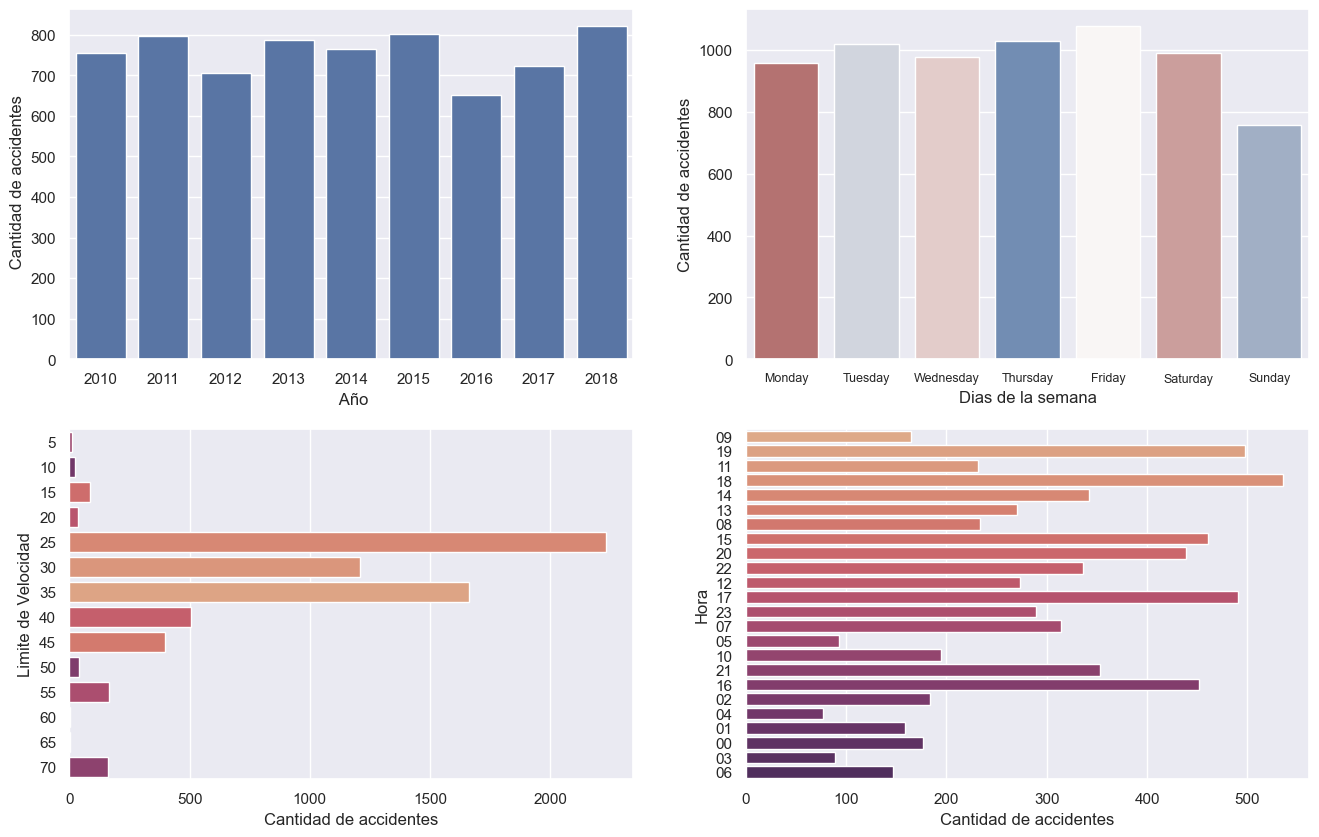

In [69]:
fig, ax = plt.subplots(2, 2, figsize=(16, 10))
sns.set_palette("ch:s=.25,rot=-.25",9)

# Año con mas accidentes
sns.countplot(x=df["Crash Year"], ax = ax[0,0])
ax[0,0].set(ylabel=' Cantidad de accidentes')
ax[0,0].set(xlabel=' Año')

# Dia de la semana con mas accidentes
dias = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
b=sns.countplot(x=df["Day of Week"], order = dias, ax = ax[0,1], hue=df["Day of Week"], palette='vlag')
b.set_xticklabels(b.get_xticklabels(), size = 9)
ax[0,1].set(ylabel='Cantidad de accidentes')
ax[0,1].set(xlabel='Dias de la semana')

# Columna: "Speed Limit at Crash Site"
# The isin() method checks if the Dataframe contains the specified value(s).

mascara = df['Speed Limit at Crash Site'].isin(['Uncoded & errors'])
df2 = df[~mascara]
order = pd.Series(df2["Speed Limit at Crash Site"].unique().astype(float)).sort_values().astype(int).astype(str)
sns.countplot(order = order, y=df2["Speed Limit at Crash Site"],ax = ax[1,0], hue=df2["Speed Limit at Crash Site"], palette='flare')
ax[1,0].set(ylabel='Limite de Velocidad')
ax[1,0].set(xlabel='Cantidad de accidentes')

# Columna: Time of Day : A que hora ocurren los accidentes

df2 = pd.DataFrame(columns=['Hora'])
#Convierto la columna a String con formato
df2['Hora']= df['Time of Day'].astype(str).str[0:8]

#Cambio las celdas con el valor Unknow por True
df2.drop(df2[(df2['Hora'] == 'Unknown')].index, inplace=True)

 # format datetime values in a DataFrame column, extracting and converting the hour (in 24-hour format) into a string
df2['Hora'] = pd.to_datetime(df2['Hora']).dt.strftime('%H')
sns.countplot(y=df2["Hora"].sort_values(), ax = ax[1,1], hue=df2["Hora"], palette='flare')
ax[1,1].set(ylabel='Hora')
ax[1,1].set(xlabel='Cantidad de accidentes')


Porcentaje de accidentes de acuerdo a las condiciones de luz: La Mayor cantidad de accidentes (53%) se producen con luz de día y un 30 % de noche pero iluminado.

Porcentaje de accidentes de acuerdo al gardo de lesiones: El 15 % de los accidentes se sospecha que tuvieron lesiones graves y el 7.55 % lesiones fatales. 


([<matplotlib.patches.Wedge at 0x1e7d9693070>,
 [Text(0.4509466697553226, 1.0033180458043123, 'Possible injury (C)'),
  Text(-1.0988058450848277, 0.05124172916108485, 'Suspected minor injury (B)'),
  Text(-0.3455134990239321, -1.0443277368681918, 'Suspected serious injury (A)'),
  Text(0.6554406155438623, -0.883401154343531, 'No injury (O)'),
  Text(1.0692115161767264, -0.2584312939159383, 'Fatal injury (K)')],
 [Text(0.2459709107756305, 0.547264388620534, '36.55%'),
  Text(-0.5993486427735423, 0.027950034087864457, '25.41%'),
  Text(-0.1884619085585084, -0.5696333110190137, '15.91%'),
  Text(0.3575130630239249, -0.48185517509647136, '14.58%'),
  Text(0.5832062815509417, -0.14096252395414813, '7.55%')])

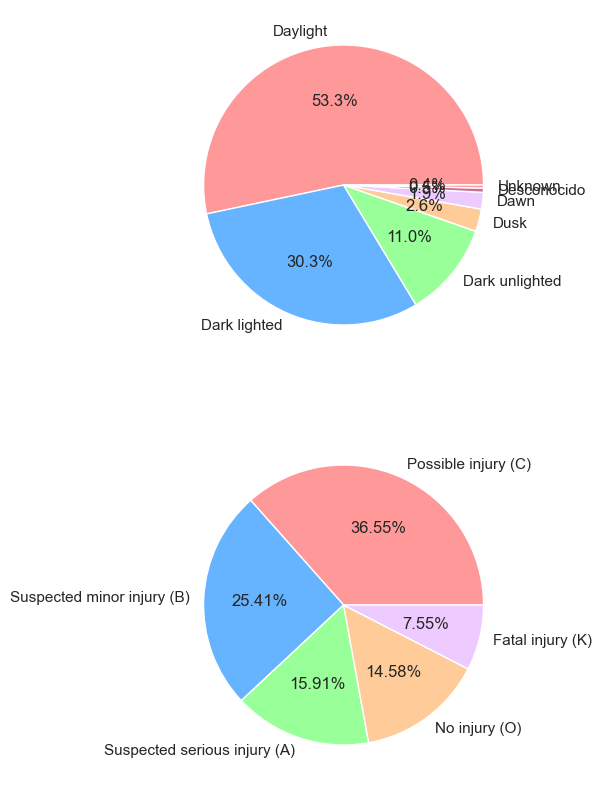

In [70]:

fig2, ax2 = plt.subplots(2, 1, figsize=(16, 10))

# Columna: "Lighting Conditions"
colores = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#EDCAFF','#c76f9a']

data = df['Lighting Conditions'].value_counts(normalize=True) * 100
ax2[0].pie(data, labels = data.index, autopct='%.1f%%',colors=colores)

# Columna:"Worst Injury in Crash"
data = df['Worst Injury in Crash'].value_counts(normalize=True) * 100
ax2[1].pie(data, labels = data.index, autopct='%.2f%%', colors=colores)

La mayoria de accidentes ocurren durante el dia y no la noche.

CANTIDAD DE ACCIDENTES POR MES

In [71]:
print(df['Crash Month'].value_counts())

Crash Month
October      695
September    647
November     625
December     604
June         586
May          580
January      559
March        542
July         531
August       512
February     482
April        446
Name: count, dtype: int64


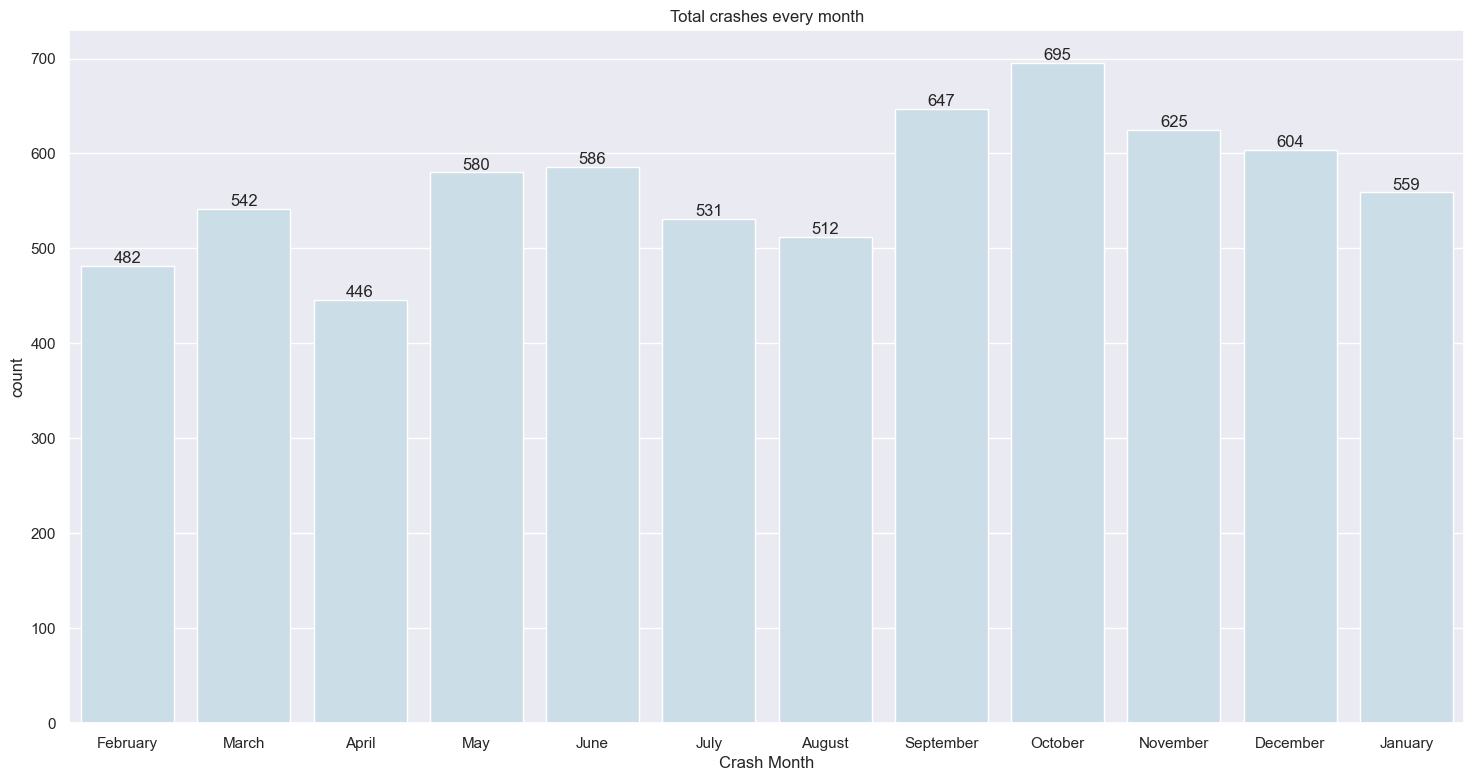

<Figure size 200x500 with 0 Axes>

In [72]:
plt.figure(figsize=(18, 9))
ax = sns.countplot(x='Crash Month', data=df)
ax.bar_label(ax.containers[0])
plt.title("Total crashes every month")
plt.show()
plt.clf()

Octubre es el mes de mas accidentes.

VARIABLE GENERO

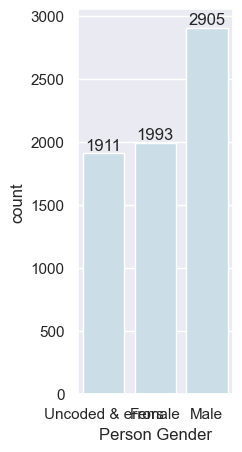

In [73]:
# En la mayoria de accidentes intervinieron Hombres
ax = sns.countplot(x = 'Person Gender',data = df)
for bars in ax.containers:
    ax.bar_label(bars)

Se comprueba una primer hipotesis repecto a que en la mayoria de accidentes intervinieron Hombres.

FRECUENCIAS DE DATOS 

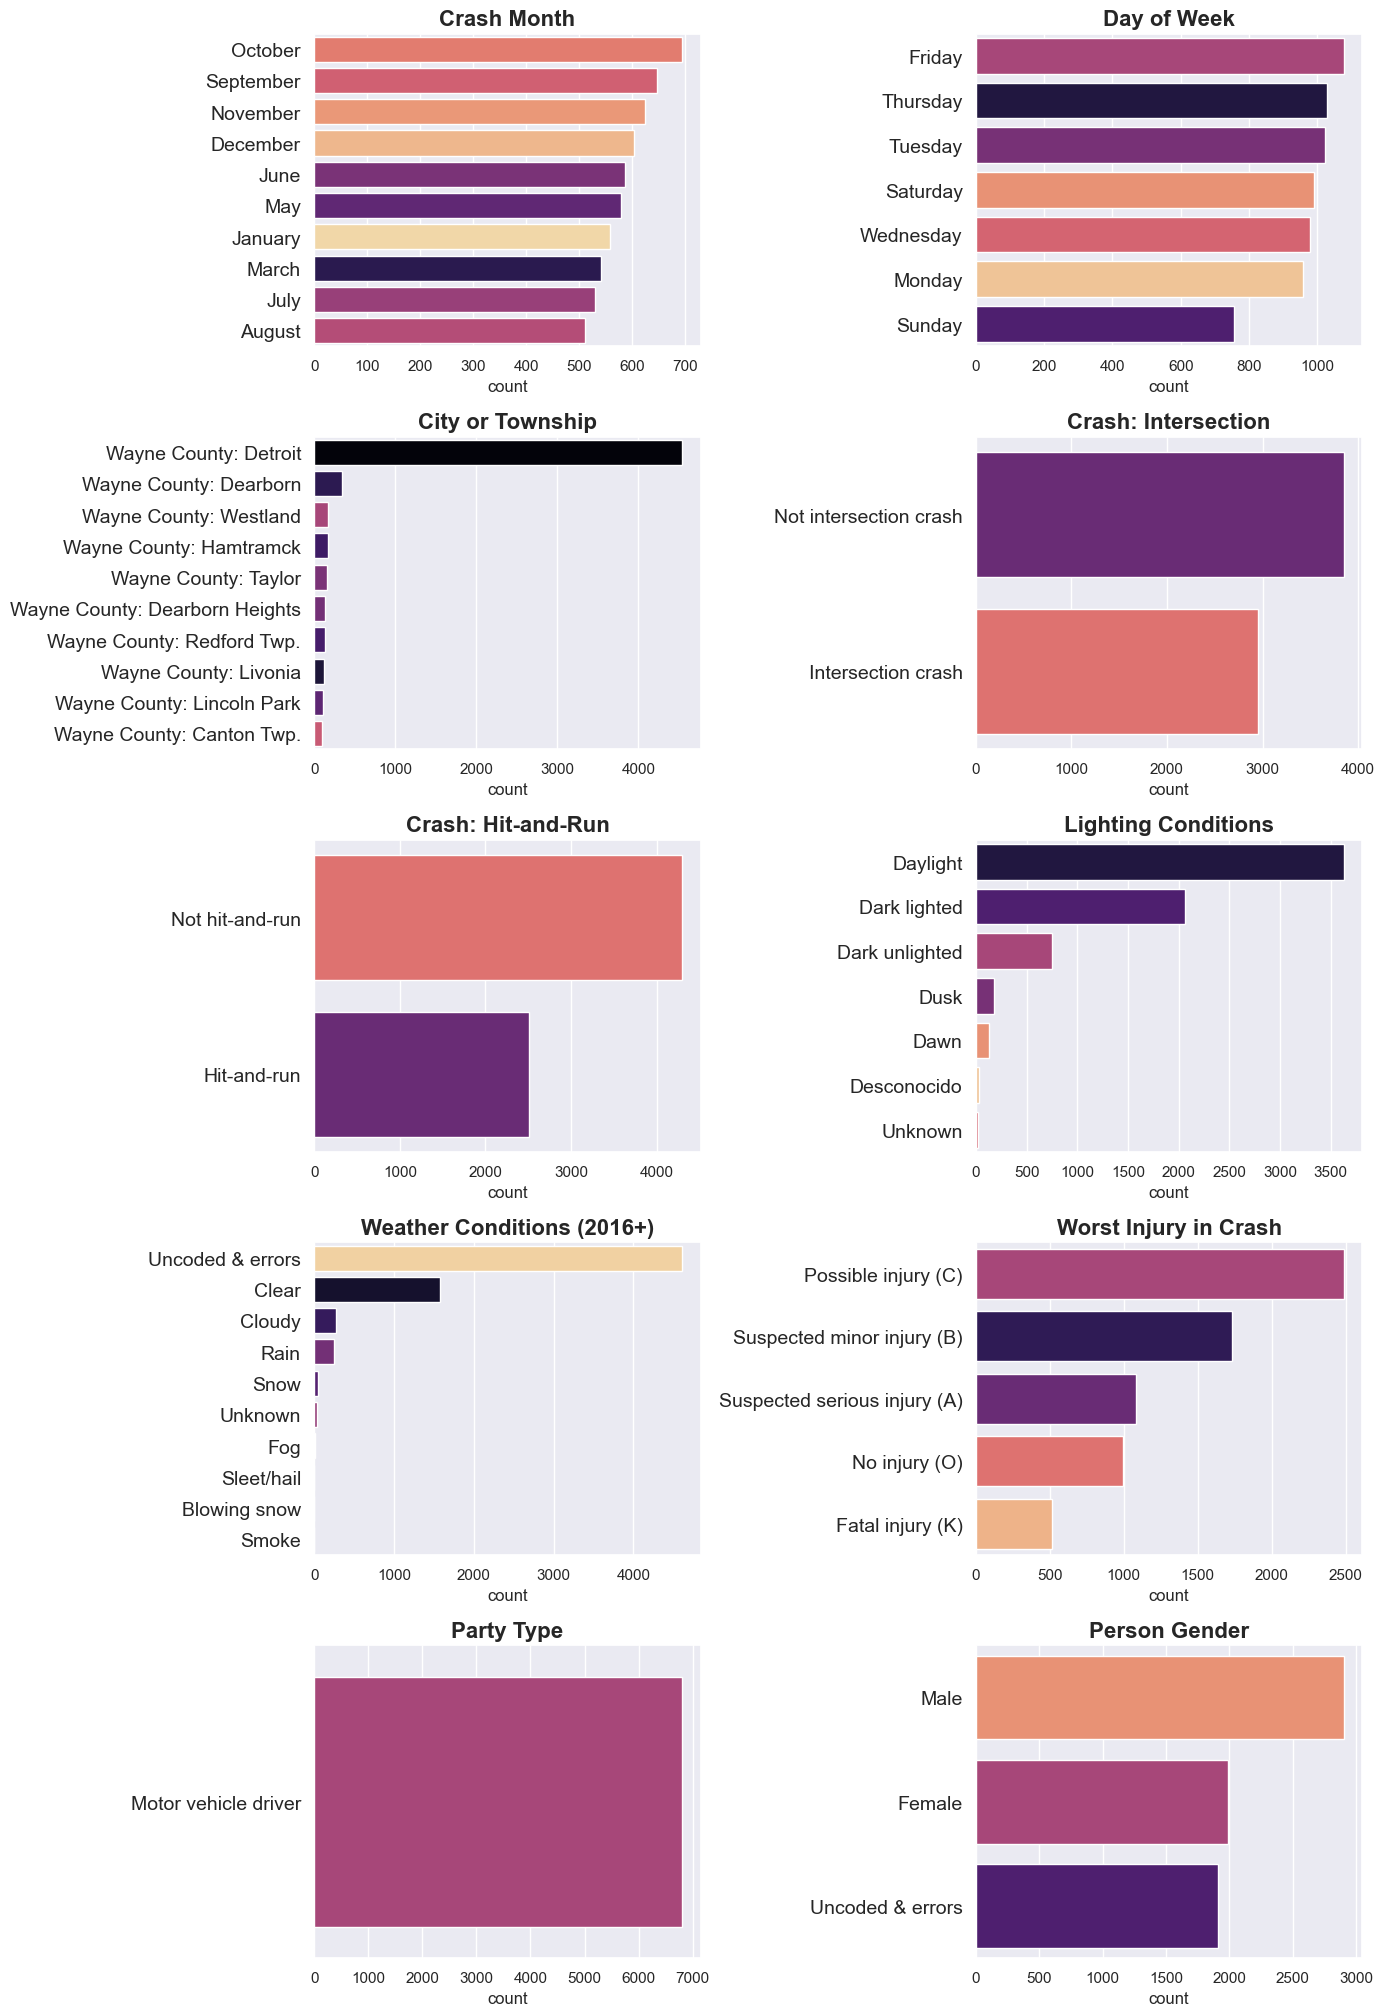

In [74]:
colunas = ['Crash Month', 'Day of Week', 'City or Township',
       'Crash: Intersection', 'Crash: Hit-and-Run', 'Lighting Conditions',
       'Weather Conditions (2016+)', 'Worst Injury in Crash', 'Party Type', 'Person Gender']

plt.figure(figsize=(14,40))
for i,col in enumerate(colunas):
    ax = plt.subplot(10,2,i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index[0:10], hue=df[col], palette="magma")
    plt.title(col, fontweight='bold', fontsize=16)
    plt.yticks(fontsize=14)
    plt.ylabel(None)
plt.tight_layout()
plt.show()

FRECUENCIA DE ACCIDENTES POR HORA

C:\Users\mastr\AppData\Local\Temp\ipykernel_24460\1594158947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['Time of Day'], order=df['Time of Day'].value_counts().index[0:10],


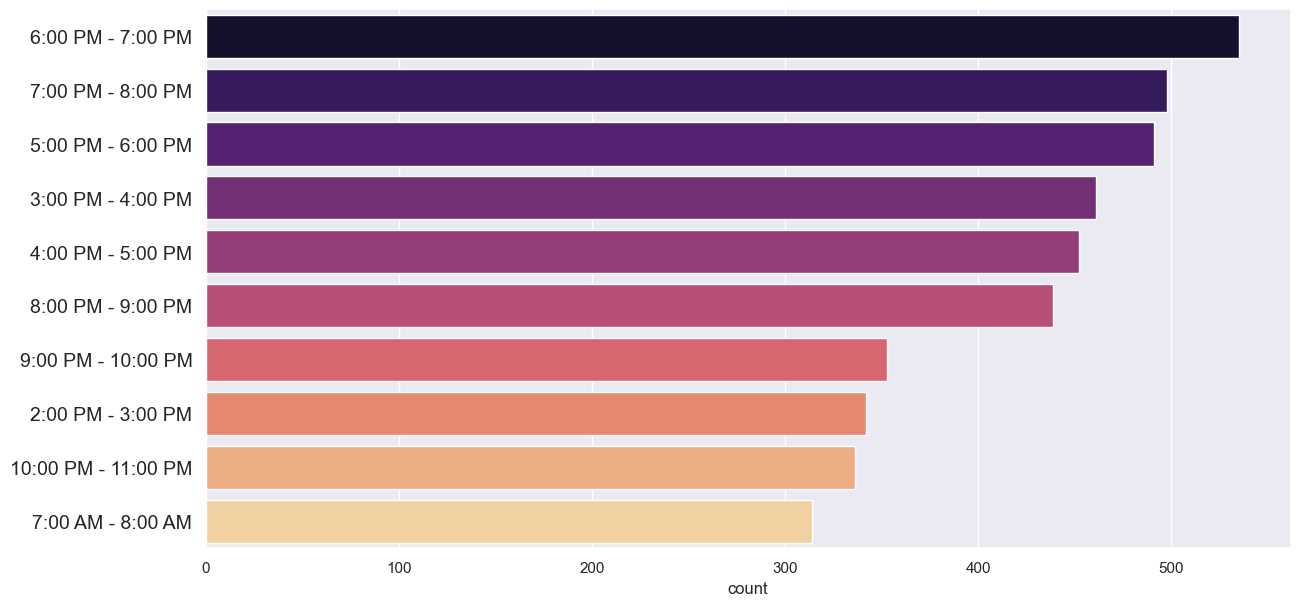

In [75]:
plt.figure(figsize=(14,7))
sns.countplot(y=df['Time of Day'], order=df['Time of Day'].value_counts().index[0:10],
              hue_order=df['Day of Week'].value_counts().index[0:3], palette="magma")
plt.yticks(fontsize=14)
plt.ylabel(None)
plt.show()

Nuevamente se observa que la franja horaria de 6 a 7 es en la que se produce la mayor cantidad de accidentes.

VARIABLE EDAD


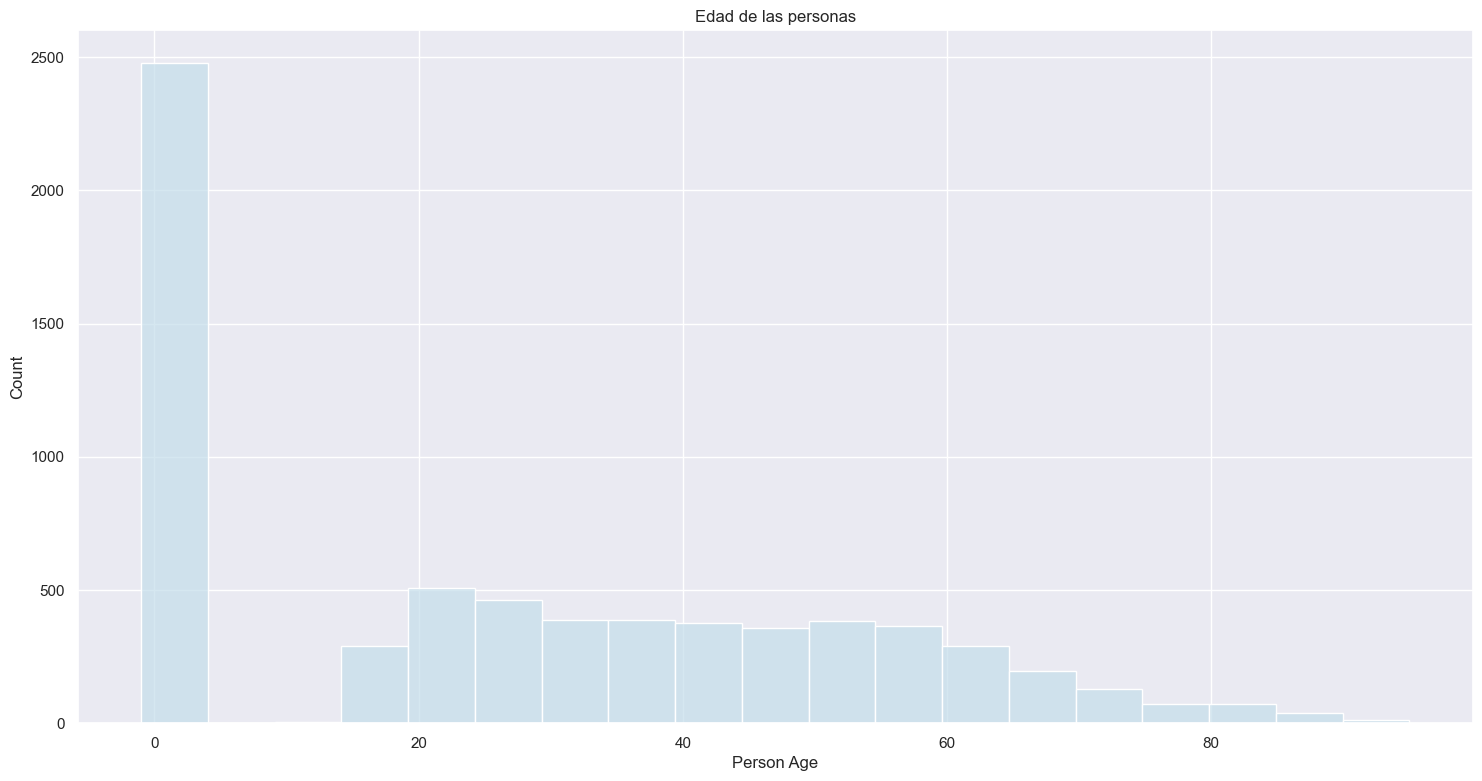

<Figure size 200x500 with 0 Axes>

In [76]:
plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=df)
plt.title("Edad de las personas")
plt.show()
plt.clf()

 Se observan muchos datos invalidos de nacimiento por lo que se removeran en el siguiente grafico.

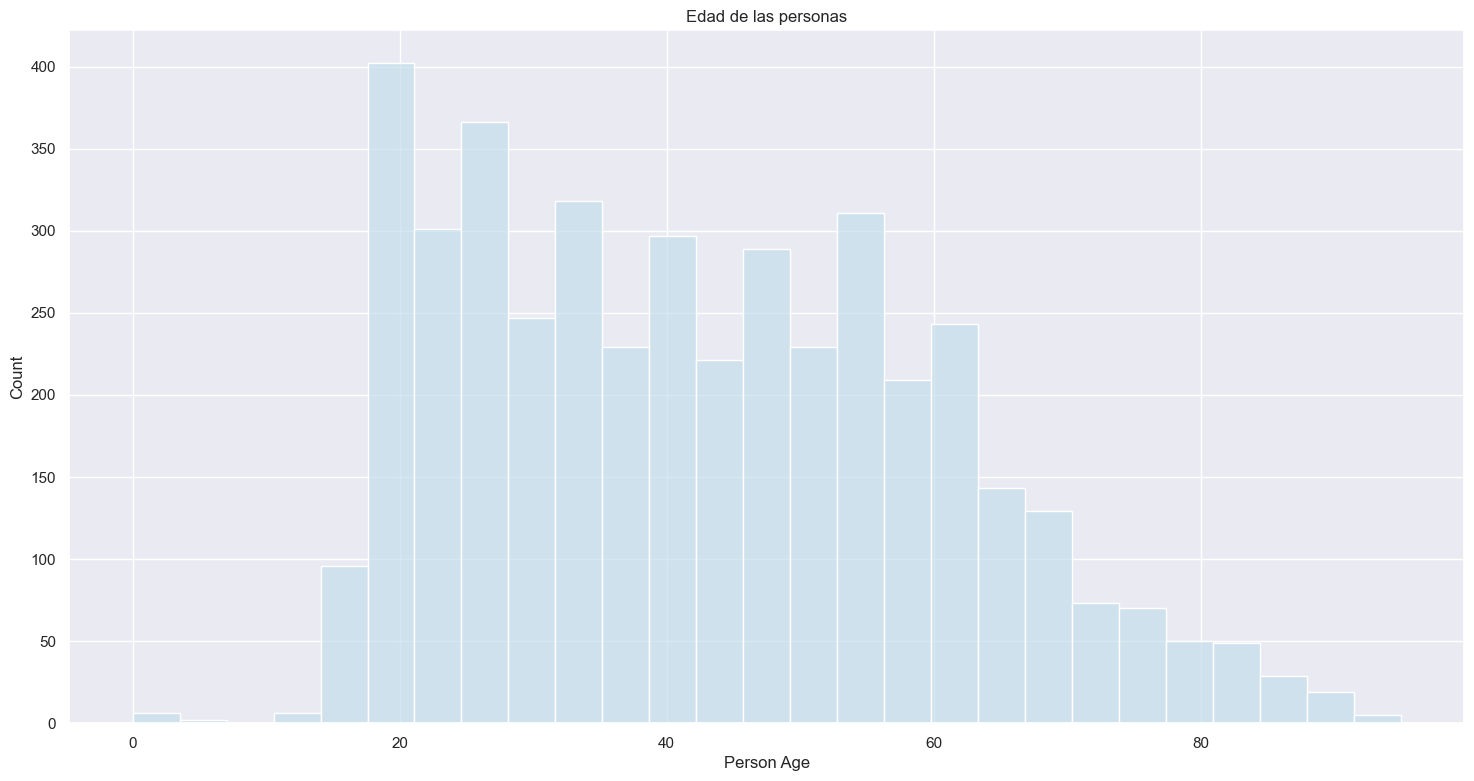

<Figure size 200x500 with 0 Axes>

In [77]:
age = df[df['Person Age'] != -1]

plt.figure(figsize=(18, 9))
sns.histplot(x='Person Age', data=age)
plt.title("Edad de las personas")
plt.show()
plt.clf()

A partir de los 20 años se observa la mayor cantidad de accidentes disminuyendo progresivamente a medida que aumenta la edad.

<Axes: ylabel='Person Age'>

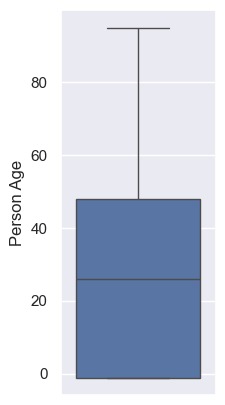

In [78]:
#Boxplot de variable edad

sns.set(rc = {"figure.figsize" : (2,5)})

sns.boxplot(df["Person Age"])

<Axes: xlabel='Person Age', ylabel='Worst Injury in Crash'>

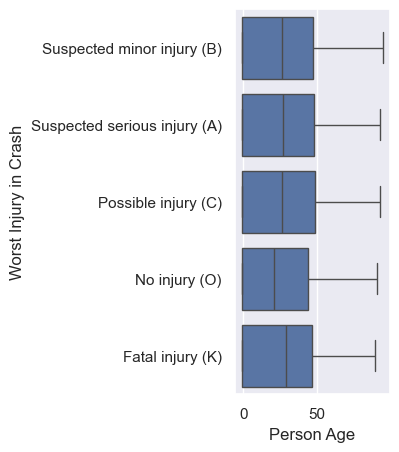

In [79]:
#Boxplot Person Age con respecto a Worst Injury in Crash
sns.boxplot(x = 'Person Age', y = 'Worst Injury in Crash', data = df) 


HEATMAPS

[Text(0.5, 11.249999999999995, 'Velocidad'),
 Text(92.24999999999999, 0.5, 'Lesiones')]

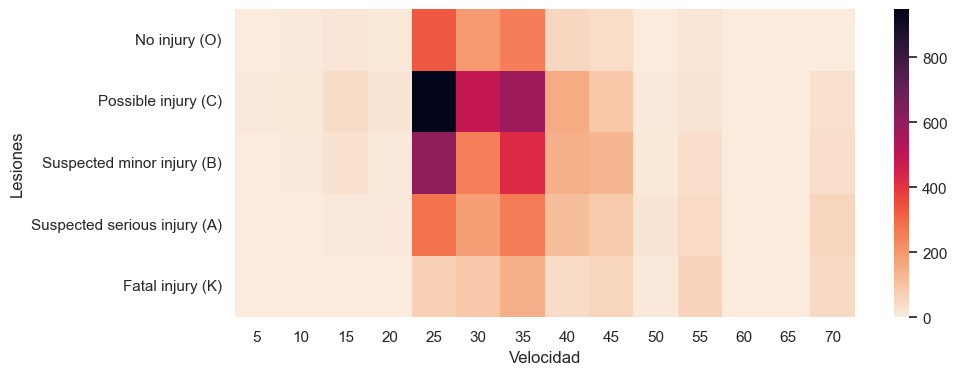

In [80]:
fig, ax = plt.subplots(1,1, figsize=(10, 4))

# VELOCIDAD VS LESIONES

col1 = 'Worst Injury in Crash'
col2 = 'Speed Limit at Crash Site'


mask = df['Speed Limit at Crash Site'].isin(['Uncoded & errors'])
df2 = df[~mask]

df3 = df2.groupby([col1, col2]).size()
df3 = pd.DataFrame(df3).reset_index()
df3 = df3.rename(columns={0: "count"})
df3 = df3.pivot(index=col1, columns=col2, values='count')

order = pd.Series(df2["Speed Limit at Crash Site"].unique().astype(float)).sort_values().astype(int).astype(str)
df3 = df3[order]

categories = ["No injury (O)", 
              "Possible injury (C)", 
              "Suspected minor injury (B)", 
              "Suspected serious injury (A)", 
              "Fatal injury (K)"]

df3.index = pd.CategoricalIndex(df3.index, categories = categories)
df3.sort_index(level=0, inplace=True)
df3 = df3.fillna(0)

sns.heatmap(df3, cmap = 'rocket_r', ax=ax)
ax.set(xlabel='Velocidad', ylabel='Lesiones')


Entre las velocidades de 25 y 45 km/hs se producen la mayor cantidad de siniestros. 

PRIMERAS CONCLUSIONES

La mayoria de los peatones involucrados en accidentes sufrieron lesiones.

Los hombres han sufrido mayor cantidad de accidentes que las mujeres. 

Respecto a la velocidad en donde ocurre la mayor cantidad de accidentes es de 25 Km/h y la mayoria de los accidentes suceden de dia con el clima despejado.

El mayor número de choques ocurre entre las 6:00 p.m. y las 7:00 p.m. (535 choques), seguido de las 5:00 p.m. y las 6:00 p.m. (491 choques) y las 7:00 p.m. y las 8:00 p.m. (498 choques). . Esto sugiere que las primeras horas de la tarde son el momento de mayor incidencia de accidentes.
Si sos un peaton y no quiere sufir accidentes es recomendable pasear los domingos del mes de octubre.

A altas horas de la noche y temprano en la mañana (por ejemplo, de 3:00 a. m. a 4:00 a. m.) se producen muchos menos accidentes.

El viernes tiene el mayor número de accidentes (1.078), mientras que el domingo tiene el menor número (756).

La mayoría de los choques ocurren durante el día (3,630 choques), pero un número significativo también ocurre en condiciones de poca luz (2,066 choques).
Las condiciones de oscuridad y falta de iluminación representan 748 accidentes, lo que indica un mayor riesgo en áreas mal iluminadas durante la noche.

Las posibles lesiones (C) son el resultado más común (2.489 casos), seguidas de las sospechas de lesiones menores (B) (1.730 casos).
Hay 514 casos de Lesiones fatales (K).




PROCESADO DE DATOS

Elimino 2 filas con valor Uncoded & errors del dataset.

In [81]:
print(dffiltrado2['Person Gender'].value_counts())

Person Gender
Male                2508
Female              1829
Uncoded & errors       2
Name: count, dtype: int64


In [82]:
dffiltrado3 = dffiltrado2[dffiltrado2['Person Gender'] != 'Uncoded & errors']

print(dffiltrado3['Person Gender'].value_counts())


Person Gender
Male      2508
Female    1829
Name: count, dtype: int64


In [83]:
dffiltrado3.head()


,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Weather Conditions (2016+),Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,Clear,30,Suspected serious injury (A),Motor vehicle driver,44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,Clear,25,Possible injury (C),Motor vehicle driver,27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,Clear,45,Possible injury (C),Motor vehicle driver,22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,Clear,35,Suspected minor injury (B),Motor vehicle driver,18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,Clear,30,Suspected minor injury (B),Motor vehicle driver,20,Female


In [84]:
print(dffiltrado3['Crash Day'].value_counts())

Crash Day
16    174
9     171
21    168
6     167
11    165
12    162
14    161
23    157
17    154
1     152
20    149
25    148
3     148
24    141
2     140
18    140
5     139
4     137
7     137
19    133
8     132
15    129
10    127
28    124
30    124
13    122
22    121
27    116
26    112
29    109
31     78
Name: count, dtype: int64


Elimino 3 filas con valor unknow de la columna Time od Day

In [85]:
print(dffiltrado3['Time of Day'].value_counts())

Time of Day
6:00 PM - 7:00 PM      358
3:00 PM - 4:00 PM      349
5:00 PM - 6:00 PM      346
7:00 PM - 8:00 PM      331
4:00 PM - 5:00 PM      311
8:00 PM - 9:00 PM      266
2:00 PM - 3:00 PM      246
7:00 AM - 8:00 AM      212
12:00 PM - 1:00 PM     199
9:00 PM - 10:00 PM     193
10:00 PM - 11:00 PM    187
1:00 PM - 2:00 PM      180
8:00 AM - 9:00 AM      163
11:00 AM - 12:00 PM    150
11:00 PM - 12:00 AM    143
10:00 AM - 11:00 AM    142
9:00 AM - 10:00 AM     113
6:00 AM - 7:00 AM       95
12:00 AM - 1:00 AM      84
2:00 AM - 3:00 AM       79
5:00 AM - 6:00 AM       59
1:00 AM - 2:00 AM       59
4:00 AM - 5:00 AM       35
3:00 AM - 4:00 AM       34
Unknown                  3
Name: count, dtype: int64


In [86]:
dffiltrado4 = dffiltrado3[dffiltrado3['Time of Day'] != 'Unknown']
print(dffiltrado4['Time of Day'].value_counts())

Time of Day
6:00 PM - 7:00 PM      358
3:00 PM - 4:00 PM      349
5:00 PM - 6:00 PM      346
7:00 PM - 8:00 PM      331
4:00 PM - 5:00 PM      311
8:00 PM - 9:00 PM      266
2:00 PM - 3:00 PM      246
7:00 AM - 8:00 AM      212
12:00 PM - 1:00 PM     199
9:00 PM - 10:00 PM     193
10:00 PM - 11:00 PM    187
1:00 PM - 2:00 PM      180
8:00 AM - 9:00 AM      163
11:00 AM - 12:00 PM    150
11:00 PM - 12:00 AM    143
10:00 AM - 11:00 AM    142
9:00 AM - 10:00 AM     113
6:00 AM - 7:00 AM       95
12:00 AM - 1:00 AM      84
2:00 AM - 3:00 AM       79
1:00 AM - 2:00 AM       59
5:00 AM - 6:00 AM       59
4:00 AM - 5:00 AM       35
3:00 AM - 4:00 AM       34
Name: count, dtype: int64


In [87]:
print(dffiltrado4['Day of Week'].value_counts())

Day of Week
Thursday     683
Friday       678
Wednesday    672
Tuesday      671
Monday       604
Saturday     598
Sunday       428
Name: count, dtype: int64


In [88]:
print(dffiltrado4['City or Township'].value_counts())

City or Township
Wayne County: Detroit                 2520
Wayne County: Dearborn                 284
Wayne County: Westland                 145
Wayne County: Taylor                   129
Wayne County: Hamtramck                113
Wayne County: Dearborn Heights         104
Wayne County: Livonia                  103
Wayne County: Redford Twp.             103
Wayne County: Lincoln Park              86
Wayne County: Canton Twp.               80
Wayne County: Highland Park             59
Wayne County: Romulus                   56
Wayne County: Brownstown Twp.           47
Wayne County: Southgate                 43
Wayne County: Inkster                   41
Wayne County: Wyandotte                 40
Wayne County: Wayne                     38
Wayne County: Garden City               33
Wayne County: Plymouth Twp.             29
Wayne County: Allen Park                25
Wayne County: Van Buren Twp.            23
Wayne County: Harper Woods              22
Wayne County: Plymouth               

In [89]:
print(dffiltrado4['Crash: Intersection'].value_counts())


Crash: Intersection
Not intersection crash    2419
Intersection crash        1915
Name: count, dtype: int64


Elimino filas en donde el valor de la columna Lighting Conditions sea Desconocido a Unknown

In [90]:
print(dffiltrado4['Lighting Conditions'].value_counts())

Lighting Conditions
Daylight          2523
Dark lighted      1148
Dark unlighted     467
Dusk               104
Dawn                72
Desconocido         14
Unknown              6
Name: count, dtype: int64


In [91]:
dffiltrado5 = dffiltrado4[
    (dffiltrado4['Lighting Conditions'] != 'Unknown') &
    (dffiltrado4['Lighting Conditions'] != 'Desconocido')
]

print(dffiltrado5['Lighting Conditions'].value_counts())

Lighting Conditions
Daylight          2523
Dark lighted      1148
Dark unlighted     467
Dusk               104
Dawn                72
Name: count, dtype: int64


In [92]:
print(dffiltrado5['Weather Conditions (2016+)'].value_counts())

Weather Conditions (2016+)
Uncoded & errors    2934
Clear                983
Cloudy               191
Rain                 161
Snow                  33
Unknown                7
Fog                    3
Sleet/hail             1
Blowing snow           1
Name: count, dtype: int64


Elimino columna Weather conditions dado que la mayoria de los valores no se encuentran codificados

In [93]:
dffiltrado6= dffiltrado5.drop(columns=['Weather Conditions (2016+)'])
dffiltrado6.head()


,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,30,Suspected serious injury (A),Motor vehicle driver,44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,25,Possible injury (C),Motor vehicle driver,27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,45,Possible injury (C),Motor vehicle driver,22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,35,Suspected minor injury (B),Motor vehicle driver,18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,30,Suspected minor injury (B),Motor vehicle driver,20,Female


Reemplazo los valores Uncoded & errors con el modo de la columna

In [94]:
print(dffiltrado6['Speed Limit at Crash Site'].value_counts())

Speed Limit at Crash Site
25                  1332
35                  1025
30                   721
40                   409
45                   314
Uncoded & errors     132
70                   126
55                   112
15                    56
50                    32
20                    21
10                    19
5                     10
65                     3
60                     2
Name: count, dtype: int64


Calculo el modo

In [95]:
speed_limit_mode = dffiltrado6['Speed Limit at Crash Site'].mode()[0]

speed_limit_mode

'25'

In [96]:
#dffiltrado6['Speed Limit at Crash Site'].fillna(speed_limit_mode, inplace=True)
dffiltrado6.loc[dffiltrado6['Speed Limit at Crash Site'] == 'Uncoded & errors', 'Speed Limit at Crash Site'] = speed_limit_mode



In [97]:
dffiltrado6.head()

,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Party Type,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,30,Suspected serious injury (A),Motor vehicle driver,44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,25,Possible injury (C),Motor vehicle driver,27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,45,Possible injury (C),Motor vehicle driver,22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,35,Suspected minor injury (B),Motor vehicle driver,18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,30,Suspected minor injury (B),Motor vehicle driver,20,Female


In [98]:
print(dffiltrado6['Speed Limit at Crash Site'].value_counts())

Speed Limit at Crash Site
25    1464
35    1025
30     721
40     409
45     314
70     126
55     112
15      56
50      32
20      21
10      19
5       10
65       3
60       2
Name: count, dtype: int64


In [99]:
print(dffiltrado6['Worst Injury in Crash'].value_counts()) 

Worst Injury in Crash
Possible injury (C)             1553
Suspected minor injury (B)      1125
Suspected serious injury (A)     729
No injury (O)                    548
Fatal injury (K)                 359
Name: count, dtype: int64


Borro columna Party Type dado que no aporta al modelo

In [100]:
print(dffiltrado6['Party Type'].value_counts()) 
dffiltrado7 = dffiltrado6.drop(columns=['Party Type'])

Party Type
Motor vehicle driver    4314
Name: count, dtype: int64


In [101]:
print(dffiltrado7['Person Age'].value_counts()) 

Person Age
19    112
20    110
22    103
23    102
21     97
     ... 
95      2
7       1
11      1
4       1
92      1
Name: count, Length: 86, dtype: int64


In [102]:
print(dffiltrado7['Person Gender'].value_counts())  

Person Gender
Male      2493
Female    1821
Name: count, dtype: int64


In [103]:
dffiltrado7.head()


,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,30,Suspected serious injury (A),44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,25,Possible injury (C),27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,45,Possible injury (C),22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,35,Suspected minor injury (B),18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,30,Suspected minor injury (B),20,Female


Codifico como entero la columna Speed Limit at Crash Site

In [104]:
dffiltrado7['Speed Limit at Crash Site'] = dffiltrado7['Speed Limit at Crash Site'].astype(int)

In [105]:
dffiltrado7.head()

,Crash Day,Time of Day,Day of Week,City or Township,Crash: Intersection,Lighting Conditions,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Person Gender
1,1,7:00 PM - 8:00 PM,Thursday,Wayne County: Detroit,Not intersection crash,Dark lighted,30,Suspected serious injury (A),44,Female
5,1,1:00 PM - 2:00 PM,Sunday,Wayne County: Detroit,Not intersection crash,Daylight,25,Possible injury (C),27,Female
6,1,8:00 AM - 9:00 AM,Tuesday,Wayne County: Southgate,Intersection crash,Daylight,45,Possible injury (C),22,Male
7,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,35,Suspected minor injury (B),18,Male
8,1,3:00 PM - 4:00 PM,Tuesday,Wayne County: Detroit,Intersection crash,Daylight,30,Suspected minor injury (B),20,Female


ENCODING - CONVERTIR VARIABLES CATEGORIAS EN NUMERICAS (One-Hot Encoding)

In [109]:
# Primero, identificamos las columnas categóricas que necesitan codificación
categorical_columns = ['Time of Day', 'Day of Week', 'City or Township', 'Crash: Intersection', 
                       'Lighting Conditions', 'Person Gender']

# Aplicamos One-Hot Encoding a estas columnas
df_encoded = pd.get_dummies(dffiltrado7, columns=categorical_columns, drop_first=True)

# To see the encoded dataset
df_encoded.head()

#Mostrar las primeras filas del dataset con las variables categóricas codificadas
#tools.display_dataframe_to_user(name="Encoded Dataset", dataframe=df_encoded)




,Crash Day,Speed Limit at Crash Site,Worst Injury in Crash,Person Age,Time of Day_10:00 PM - 11:00 PM,Time of Day_11:00 AM - 12:00 PM,Time of Day_11:00 PM - 12:00 AM,Time of Day_12:00 AM - 1:00 AM,Time of Day_12:00 PM - 1:00 PM,Time of Day_1:00 AM - 2:00 AM,...,City or Township_Wayne County: Wayne,City or Township_Wayne County: Westland,City or Township_Wayne County: Wood Haven,City or Township_Wayne County: Wyandotte,Crash: Intersection_Not intersection crash,Lighting Conditions_Dark unlighted,Lighting Conditions_Dawn,Lighting Conditions_Daylight,Lighting Conditions_Dusk,Person Gender_Male
1,1,30,Suspected serious injury (A),44,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
5,1,25,Possible injury (C),27,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False
6,1,45,Possible injury (C),22,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
7,1,35,Suspected minor injury (B),18,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
8,1,30,Suspected minor injury (B),20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


NO SE OBSERVAN VALORES FALTANTES

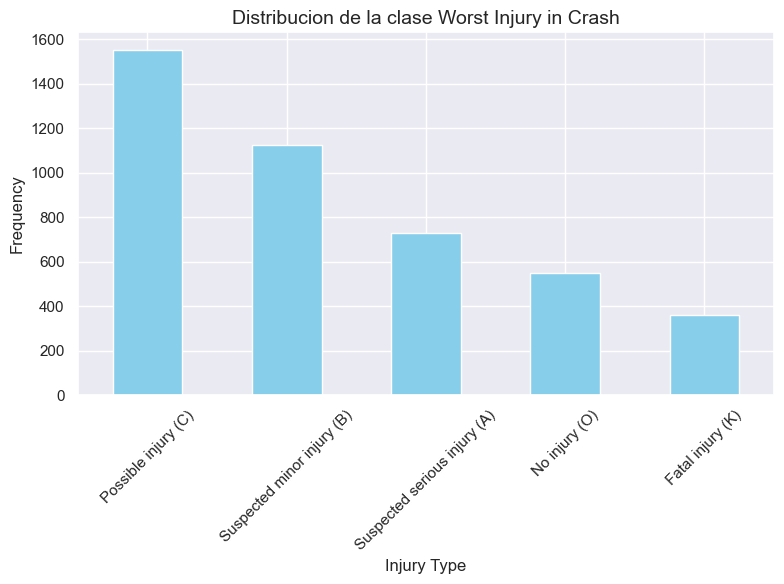

In [110]:
# Visualizar la distribución de clases en la columna "Worst Injury in Crash"
class_distribution = dffiltrado7['Worst Injury in Crash'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(8,6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribucion de la clase Worst Injury in Crash', fontsize=14)
plt.xlabel('Injury Type', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

MODELADO DE DATOS

De acuerdo al problema planteado defino que voy a realizar aprendisaje supervisado.

La variable target para clasificacion contiene las siguientes categorias:

"No injury (O)"
"Possible injury (C)"
"Suspected minor injury (B)"
"Suspected serious injury (A)"

Exploramos factores que pueden influenciar en la severidad de los acidentes de transito. Esto implica analalizar las relaciones entre las varaiabales tales como dia de la semana, condiciones de luz,  tiempo, velocidad.

MODELADO RANDOM FOREST

Se relizará un modelo de clasificación. Dado que queremos predecir el tipo de lesión, usaremos el modelo de Random Forest. 

Dividir el dataset en variables independientes (X) y la variable objetivo (y).
Dividir los datos en conjuntos de entrenamiento y prueba.
Entrenar el modelo (en este caso, usaremos Random Forest para obtener resultados sólidos).
Evaluar el rendimiento del modelo usando métricas comunes como precisión, recall y matriz de confusión.

Cada tipo de lesión está representado por la frecuencia de ocurrencia. Como se puede observar, las lesiones de tipo "Possible injury (C)" son las más comunes, mientras que las "Fatal injury (K)" son las menos frecuentes.

In [111]:

# Definir variables independientes (X) y variable objetivo (y)
X = df_encoded.drop(columns=['Worst Injury in Crash'])
y = df_encoded['Worst Injury in Crash']

print (y)

# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Realizar predicciones
y_pred = rf_model.predict(X_test)

# Evaluar el modelo
classification_rep = classification_report(y_test, y_pred)

conf_matrix = confusion_matrix(y_test, y_pred)

classification_rep


1       Suspected serious injury (A)
5                Possible injury (C)
6                Possible injury (C)
7         Suspected minor injury (B)
8         Suspected minor injury (B)
                    ...             
6799             Possible injury (C)
6800                Fatal injury (K)
6801                   No injury (O)
6805      Suspected minor injury (B)
6808             Possible injury (C)
Name: Worst Injury in Crash, Length: 4314, dtype: object


'                              precision    recall  f1-score   support\n\n            Fatal injury (K)       0.32      0.21      0.26       108\n               No injury (O)       0.27      0.12      0.17       144\n         Possible injury (C)       0.46      0.65      0.54       484\n  Suspected minor injury (B)       0.37      0.38      0.38       343\nSuspected serious injury (A)       0.36      0.19      0.24       216\n\n                    accuracy                           0.41      1295\n                   macro avg       0.36      0.31      0.32      1295\n                weighted avg       0.39      0.41      0.38      1295\n'

Precisión general: 41%

Desglose por clases:
Fatal injury (K): Precisión = 32%, Recall = 21%
No injury (O): Precisión = 27%, Recall = 12%
Possible injury (C): Precisión = 46%, Recall = 65%
Suspected minor injury (B): Precisión = 37%, Recall = 38%
Suspected serious injury (A): Precisión = 36%, Recall = 19%

Este modelo muestra un rendimiento aceptable para las clases más frecuentes, pero tiene dificultades para predecir correctamente las clases menos representadas, como las lesiones fatales y sin lesión.

MATRIZ DE CONFUSION
 La matriz muestra el número de predicciones correctas (diagonal) y los errores de predicción (fuera de la diagonal) para cada tipo de lesión.

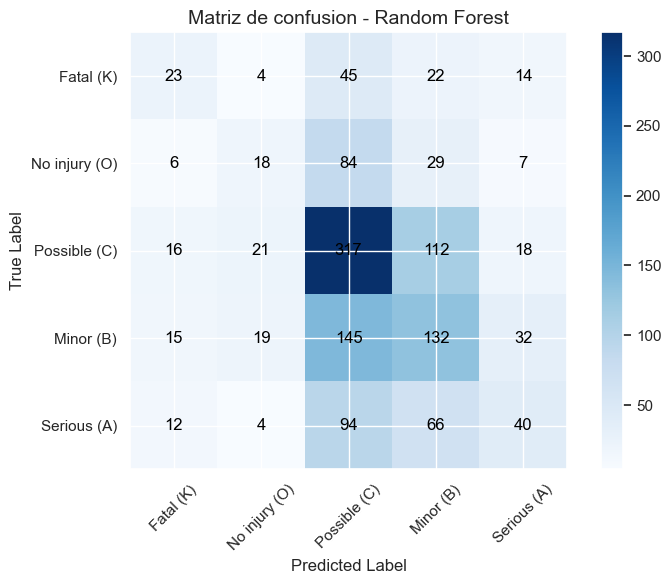

In [112]:

plt.figure(figsize=(8,6))
plt.title("Matriz de confusion - Random Forest", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Graficar la matriz de confusión
conf_matrix_display = plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')

# Añadir etiquetas en los cuadros de la matriz
plt.colorbar(conf_matrix_display)
plt.xticks(ticks=range(5), labels=['Fatal (K)', 'No injury (O)', 'Possible (C)', 'Minor (B)', 'Serious (A)'], rotation=45)
plt.yticks(ticks=range(5), labels=['Fatal (K)', 'No injury (O)', 'Possible (C)', 'Minor (B)', 'Serious (A)'])

# Añadir valores en la matriz
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[0])):
        plt.text(j, i, conf_matrix[i, j], ha='center', va='center', color="black")

plt.tight_layout()
plt.show()

MODELADO REGRESION LOGISTICA

In [113]:
from sklearn.linear_model import LogisticRegression

# Entrenar un modelo de regresión logística
logreg_model = LogisticRegression(max_iter=10000, random_state=42)
logreg_model.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred_logreg = logreg_model.predict(X_test)

# Evaluar el modelo de regresión logística
classification_rep_logreg = classification_report(y_test, y_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_test, y_pred_logreg)

classification_rep_logreg


'                              precision    recall  f1-score   support\n\n            Fatal injury (K)       0.35      0.18      0.23       108\n               No injury (O)       0.25      0.01      0.01       144\n         Possible injury (C)       0.41      0.72      0.52       484\n  Suspected minor injury (B)       0.34      0.27      0.30       343\nSuspected serious injury (A)       0.29      0.15      0.20       216\n\n                    accuracy                           0.38      1295\n                   macro avg       0.33      0.27      0.26      1295\n                weighted avg       0.35      0.38      0.33      1295\n'

Precisión general: 38%

Desglose por clases:
Fatal injury (K): Precisión = 35%, Recall = 18%
No injury (O): Precisión = 25%, Recall = 1%
Possible injury (C): Precisión = 41%, Recall = 72%
Suspected minor injury (B): Precisión = 34%, Recall = 27%
Suspected serious injury (A): Precisión = 29%, Recall = 15%

El modelo tiene un rendimiento moderado, similar al modelo de Random Forest, pero sigue teniendo dificultades con las clases menos frecuentes.

Reporte de clasificación:
Precisión global: La precisión varía entre las clases, mejorando en algunas áreas comparado con el modelo Random Forest.
Desglose por clase:
Fatal injury (K): Mejor precisión y recall en comparación con Random Forest.
No injury (O): Rendimiento aún bajo, aunque con pequeñas mejoras.
Possible injury (C): El rendimiento sigue siendo alto, con buena precisión y recall.
Suspected minor injury (B): Mejora en la precisión y recall respecto al Random Forest.
Suspected serious injury (A): Ligera mejora, pero sigue siendo una clase difícil de predecir.

PRUEBA DE AGRUPAR COLUMNA Worst Injury in Crash EN ACCIDENTES CON O SIN LESIONES

In [114]:
# Grouping the "Worst Injury in Crash" column into two categories: "No Injury (O)" and "Injury"
dffiltrado8 = dffiltrado7
dffiltrado8['Injury Category'] = dffiltrado8['Worst Injury in Crash'].apply(lambda x: 'No Injury (O)' if x == 'No injury (O)' else 'Injury')

# Displaying the count of each new category to verify the grouping
injury_category_counts = dffiltrado8['Injury Category'].value_counts()

# Display the results
injury_category_counts


Injury Category
Injury           3766
No Injury (O)     548
Name: count, dtype: int64

ALGORITMOS DE CLASIFICACION 

FUNCION PARA GRAFICAR MATRIZ DE CONFUSION

In [115]:
def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['No Injury', 'Injury'], yticklabels=['No Injury', 'Injury'])
    plt.title(f'Matriz de confusion - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Prediccion')
    plt.show()

MODELO RANDOM FOREST

In [116]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Seleccionamos featrures
features = ['Time of Day', 'Speed Limit at Crash Site', 'Crash: Intersection', 'Lighting Conditions']

# Codificamos variables categoricas.
encoded_data = dffiltrado8.copy()
for column in features:
    encoder = LabelEncoder()
    encoded_data[column] = encoder.fit_transform(encoded_data[column])

# La variable target es la nueva categoria 'Injury Category'
X = encoded_data[features]
y = encoded_data['Injury Category'].apply(lambda x: 1 if x == 'Injury' else 0)  # 1 for Injury, 0 for No Injury

# Divido datos para entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenamiento
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Prediccion
y_pred = model.predict(X_test)

# Reporte
report = classification_report(y_test, y_pred)

report


'              precision    recall  f1-score   support\n\n           0       0.13      0.03      0.05       144\n           1       0.89      0.98      0.93      1151\n\n    accuracy                           0.87      1295\n   macro avg       0.51      0.50      0.49      1295\nweighted avg       0.81      0.87      0.83      1295\n'

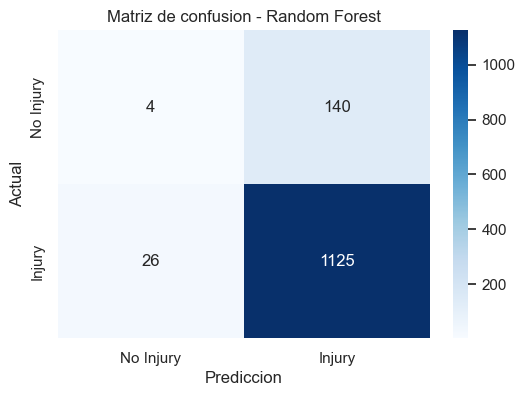

In [117]:
#Matriz de confusion

plot_confusion_matrix("Random Forest", y_test, y_pred)

El modelo analitico Random Forest fue entrenado para predecir lesiones. 

Su performance fue:

Precision for No Injury (0): 0.13
Recall for No Injury (0): 0.03
Precision for Injury (1): 0.89
Recall for Injury (1): 0.98
Overall accuracy: 87%

El modelo tiene una buena performance en predecir lesiones, pero no funciona identificando accidentes sin lesiones. Esto puede deberse por falta de datos.

MODELO DE REGRESION LOGISTICA

In [118]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression model
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred_logistic = logistic_model.predict(X_test)

logistic_report = classification_report(y_test, y_pred_logistic)

logistic_report



C:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       144\n           1       0.89      1.00      0.94      1151\n\n    accuracy                           0.89      1295\n   macro avg       0.44      0.50      0.47      1295\nweighted avg       0.79      0.89      0.84      1295\n'

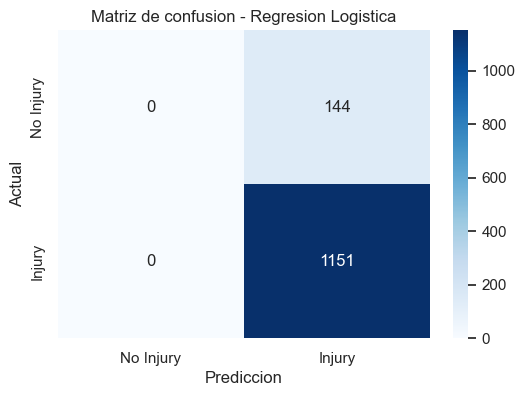

In [119]:
#Matriz de confusion

plot_confusion_matrix("Regresion Logistica", y_test, y_pred_logistic)

The Logistic Regression model results in the following performance:

Precision de No Injury (0): 0.0 (El modelo nop predice casos sin lesiones)
Recall de No Injury (0): 0.00
Precision de Injury (1): 0.89
Recall de Injury (1): 1.00
Overall accuracy: 89%

El modelo de regresion logisitca tiene resultados similares. Falla en predecir casos sin lesiones, haciendo foco solo en predecir casos con lesiones. 

MODELO  K-Nearest Neighbors (KNN)

In [120]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report


X = encoded_data[features]
y = encoded_data['Injury Category'].apply(lambda x: 1 if x == 'Injury' else 0)  # 1 for Injury, 0 for No Injury


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)


y_pred_knn = knn_model.predict(X_test)


knn_report = classification_report(y_test, y_pred_knn)

knn_report




'              precision    recall  f1-score   support\n\n           0       0.14      0.03      0.06       144\n           1       0.89      0.97      0.93      1151\n\n    accuracy                           0.87      1295\n   macro avg       0.52      0.50      0.49      1295\nweighted avg       0.81      0.87      0.83      1295\n'

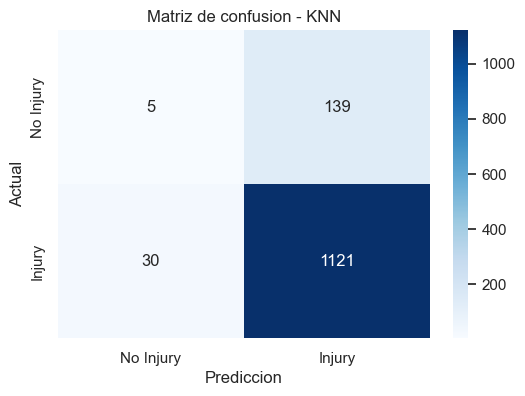

In [121]:
plot_confusion_matrix("KNN", y_test, y_pred_knn)

Performance del modelo The K-Nearest Neighbors (KNN):

Precision de No Injury (0): 0.18
Recall de No Injury (0): 0.05
Precision de  Injury (1): 0.89
Recall de Injury (1): 0.97
Precision general: 87%

Con el modelo KNN se obtienen resultados a los otros modelos, con una mejor performance prediciendo lesiones pero con problemas para predecir casos sin lesiones debido al desbalanceo de clases.

Alguna de las clases de muestra es una clase “minoritaria” es decir, de la cual tenemos muy poquitas muestras. Esto provoca un desbalanceo en los datos que utilizaremos para el entrenamiento de nuestra máquina.

XGBOOST

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)


y_pred_xgb = xgb_model.predict(X_test)


xgb_report = classification_report(y_test, y_pred_xgb)


xgb_report




'              precision    recall  f1-score   support\n\n           0       0.30      0.02      0.04       144\n           1       0.89      0.99      0.94      1151\n\n    accuracy                           0.89      1295\n   macro avg       0.60      0.51      0.49      1295\nweighted avg       0.82      0.89      0.84      1295\n'

Insights:

Precision para "No Injury" (0): 0.30 (Mejor comparado a otros modelos)
Recall para "No Injury" (0): 0.20 (mejor que los anteriores modelos)
Precision general: 89% (similar a los anteriores)

El modelo XGBoost predice un poco mejor los casos de sin lesiones pero aun tiene problemas por el desbalanceo de clases.

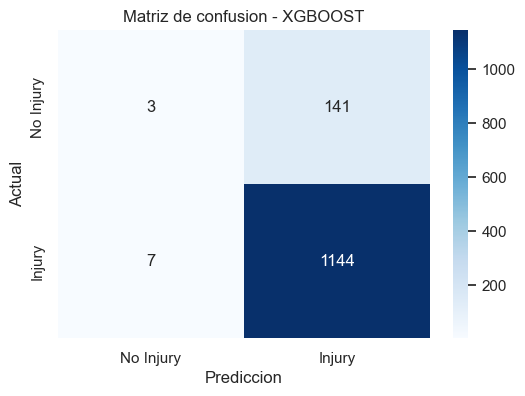

In [123]:
plot_confusion_matrix("XGBOOST", y_test, y_pred_xgb)

UTILIZAR SMOTE PARA BALANCEAR EL MODELO

In [124]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

xgb_model_smote = XGBClassifier(random_state=42)
xgb_model_smote.fit(X_resampled, y_resampled)

y_pred_xgb_smote = xgb_model_smote.predict(X_test)

print(classification_report(y_test, y_pred_xgb_smote))


              precision    recall  f1-score   support

           0       0.14      0.51      0.22       144
           1       0.91      0.60      0.72      1151

    accuracy                           0.59      1295
   macro avg       0.52      0.56      0.47      1295
weighted avg       0.82      0.59      0.67      1295



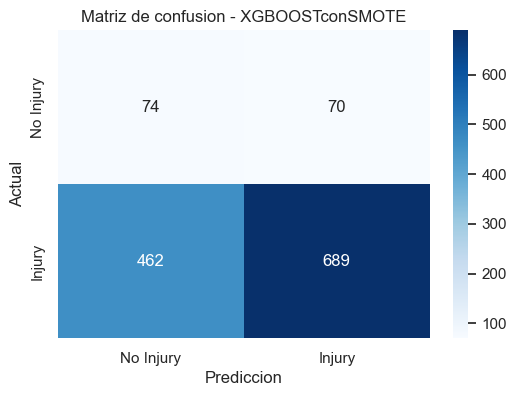

In [125]:
plot_confusion_matrix("XGBOOSTconSMOTE", y_test, y_pred_xgb_smote)

Con SMOTE mejora la prediccion de casos sin lesiones muy brevemente a costa de reducir la prediccion en los casos de lesiones. 

COMPARACION DE MODELOS

Se describe una tabla comparativa que resume el rendimiento de cada modelo en las métricas clave: precisión, recuperación y exactitud tanto para casos con lesiones como sin lesiones.

In [126]:
# Random Forest
random_forest_report = {
    'Model': 'Random Forest',
    'Precision Injury': 0.89,
    'Recall Injury': 0.98,
    'Precision No Injury': 0.13,
    'Recall No Injury': 0.03,
    'Accuracy': 0.87
}

# Regresion logistica
logistic_report = {
    'Model': 'Logistic Regression',
    'Precision Injury': 0.89,
    'Recall Injury': 1.00,
    'Precision No Injury': 0.00,
    'Recall No Injury': 0.00,
    'Accuracy': 0.89
}


# KNN
knn_report_data = {
    'Model': 'KNN',
    'Precision Injury': 0.89,
    'Recall Injury': 0.99,
    'Precision No Injury': 0.30,
    'Recall No Injury': 0.02,
    'Accuracy': 0.87
}

# XGBOOST
XGBOOST_report = {
    'Model': 'XGBOOST',
    'Precision Injury': 0.89,
    'Recall Injury': 0.97,
    'Precision No Injury': 0.18,
    'Recall No Injury': 0.05,
    'Accuracy': 0.89
}


# XGBOOST CON SMOTE
xgboostconsmote_report = {
    'Model': 'XGBoostconSmote',
    'Precision Injury': 0.91,
    'Recall Injury': 0.60,
    'Precision No Injury': 0.14,
    'Recall No Injury': 0.51,
    'Accuracy': 0.59
}


comparison_data = pd.DataFrame([random_forest_report, logistic_report, knn_report_data, XGBOOST_report, xgboostconsmote_report ])



GRAFICO COMPARATIVO DE MODELOS

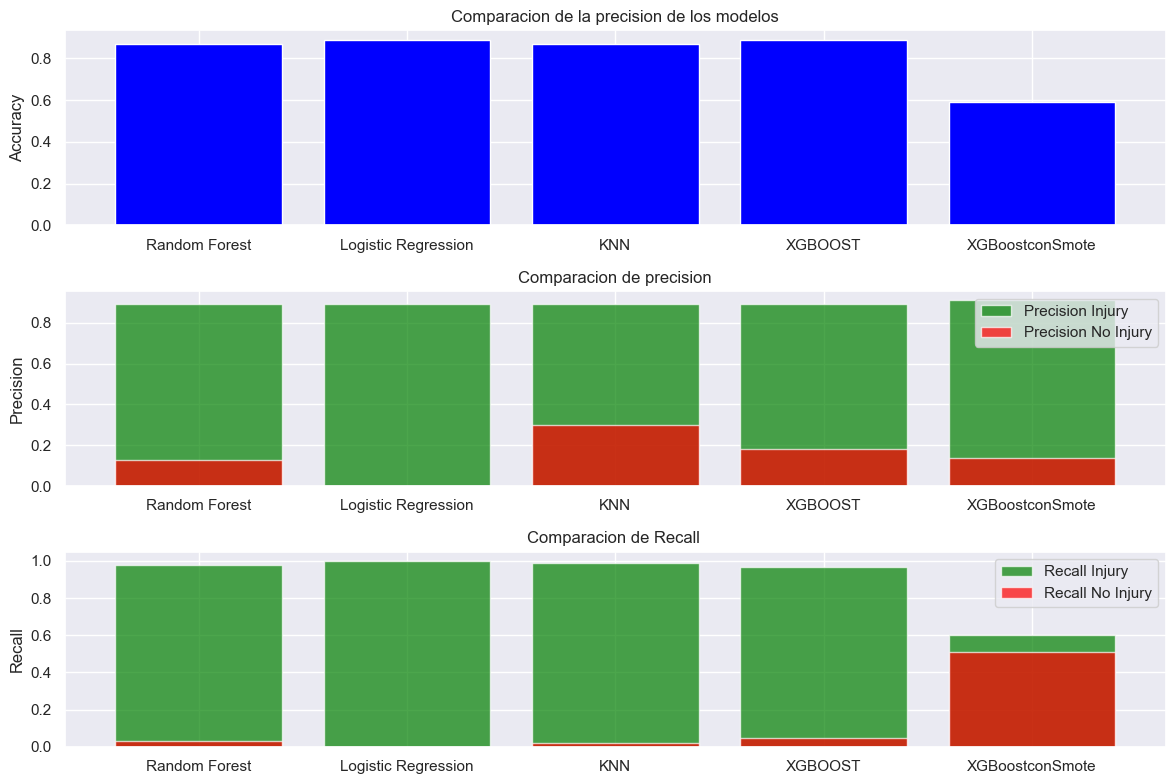

In [127]:
import matplotlib.pyplot as plt


models = comparison_data['Model']
accuracy = comparison_data['Accuracy']
precision_injury = comparison_data['Precision Injury']
recall_injury = comparison_data['Recall Injury']
precision_no_injury = comparison_data['Precision No Injury']
recall_no_injury = comparison_data['Recall No Injury']

plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.bar(models, accuracy, color='blue')
plt.title('Comparacion de la precision de los modelos')
plt.ylabel('Accuracy')

plt.subplot(3, 1, 2)
plt.bar(models, precision_injury, color='green', label='Precision Injury', alpha=0.7)
plt.bar(models, precision_no_injury, color='red', label='Precision No Injury', alpha=0.7)
plt.title('Comparacion de precision')
plt.ylabel('Precision')
plt.legend()

plt.subplot(3, 1, 3)
plt.bar(models, recall_injury, color='green', label='Recall Injury', alpha=0.7)
plt.bar(models, recall_no_injury, color='red', label='Recall No Injury', alpha=0.7)
plt.title('Comparacion de Recall ')
plt.ylabel('Recall')
plt.legend()

plt.tight_layout()
plt.show()


CONCLUSIONES


Deteccion de lesiones: Todos los modelos tienen una buena performance detectando casos con lesiones y muy pocos casos no son detectados.

Detecciones de sin lesiones: Ninguno de los modelos presenta una buena performance en predecir casos sin lesiones. Los modelos de regresion logistica y SVM fallan en identificar casos sin lesiones aunque los modelos Random Forest y KNN lo realizan un poco mejor.

Clases desbalanceadas: La baja performance en predecir casos sin lesiones se debe probablemente a un desbalanceo de clases dado que se encuentran muy pocos casos sin lesiones en el dataset comparado con los casos con lesiones.

Se podrian generar tecnicas para mejorar la cantidad de casos sin lesiones de forma de balancear el dataset.

